# 05. forecast(시계열)

## 1. 배경 및 설치

- 1. Visual C++ Build Tool
- 2. conda install pandas-datareader
- 3. conda install -c conda-forge fbprophet
- 4. pip install fbprophet

In [1]:
from pandas_datareader import data

In [2]:
from fbprophet import Prophet

---

In [1]:
def test_def(a, b):
    return a + b


In [2]:
test_def(2, 3)

5

-  가장 기초적인 모양의 def 정의
-  이름(test_def)과 입력 인자(a, b)를 정해준다
- 출력(return)을 작성

In [7]:
# 전역변수(global)

a = 1

def edit_a(i):
    # 지역변수(local)
    global a
    a = i

In [8]:
edit_a(2)

In [9]:
a

2

- global 변수를 def 내에서 사용하고 싶다면 global로 선언

In [10]:
def edit_a(i):
    a = i

In [11]:
edit_a(5)
print(a)

2


def 내에서의 변수와 밖에서의 변수는 같은 이름이어도 같은 것이 아니다


$$ y= asin(2\pi ft + t_0) + b $$

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [25]:
def plotSinWave(amp, freq, endTime, sampleTime, startTime,  bias):
    """ # doc string 안에 들어가는 내용
    plot sine wave
    y = a sin(2 pt f t + t_0) + b
    """

    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias

    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t" + str(startTime) + ")" + str(bias))
    plt.show()

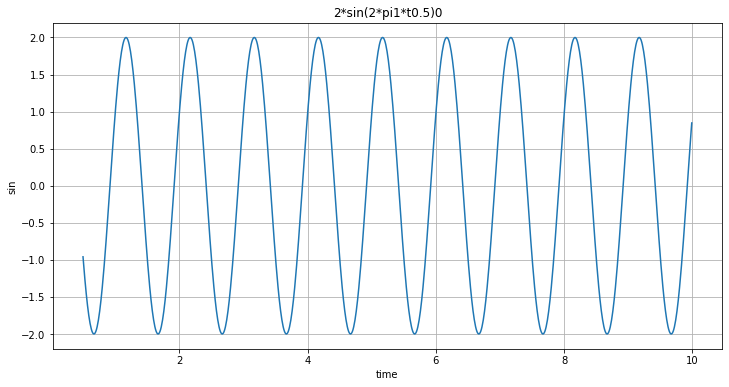

In [26]:
plotSinWave(2, 1, 10, 0.01, 0.5, 0)

In [28]:
def plotSinWave(**kwargs):
    """ # doc string 안에 들어가는 내용
    plot sine wave
    y = a sin(2 pt f t + t_0) + b
    """
    endTime = kwargs.get("endTime", 1)
    sampleTime = kwargs.get("sampleTime", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    startTime = kwargs.get("startTime", 0) 
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))



    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias

    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t" + str(startTime) + ")" + str(bias))
    plt.show()

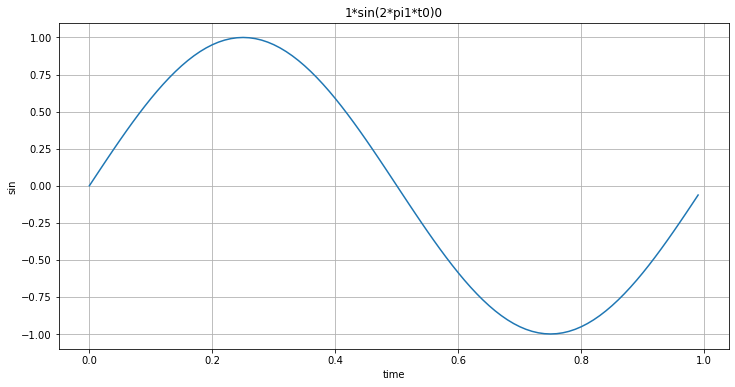

In [29]:
plotSinWave()

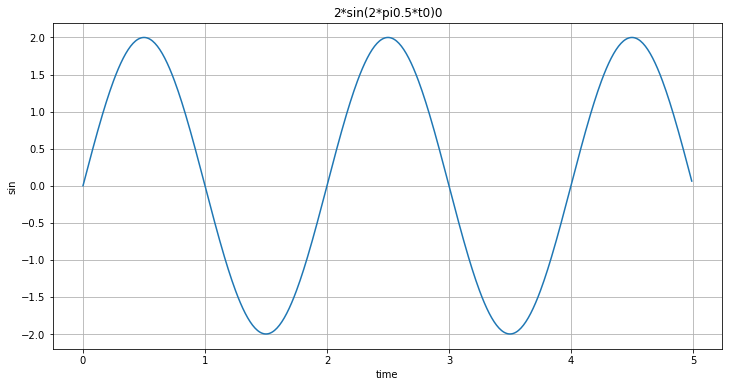

In [30]:
plotSinWave(amp=2, freq=0.5, endTime = 5)

## 내가 만든 함수 import
- drawsinWave.py

In [33]:
%%writefile ./drawSinWave.py

import numpy as np
import matplotlib.pyplot as plt

def plotSinWave(**kwargs):
    """ # doc string 안에 들어가는 내용
    plot sine wave
    y = a sin(2 pt f t + t_0) + b
    """
    endTime = kwargs.get("endTime", 1)
    sampleTime = kwargs.get("sampleTime", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    startTime = kwargs.get("startTime", 0) 
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))



    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias

    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t" + str(startTime) + ")" + str(bias))
    plt.show()

if __name__ == "__main__":
    print("hello world~!!")
    print("this is test graph")
    plotSinWave(amp = 1, endTime=2)

Overwriting ./drawSinWave.py


In [34]:
import drawSinWave as dS 


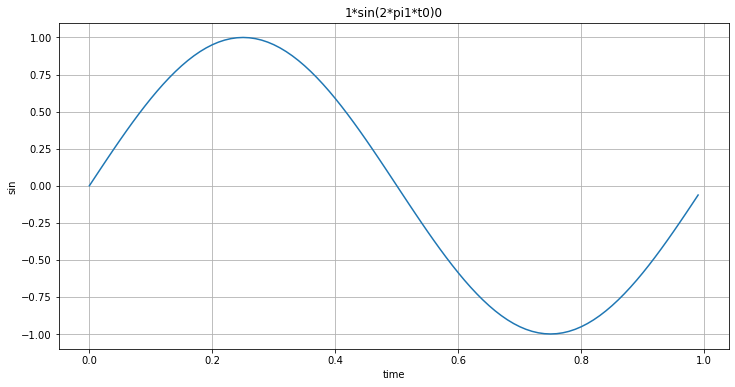

In [35]:
dS.plotSinWave()

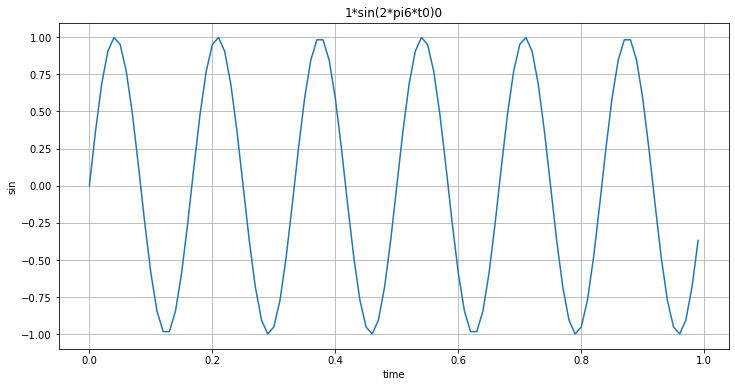

In [37]:
dS.plotSinWave(freq=6)

## 그래프 한글 설정

In [40]:
%%writefile ./set_matplotlib_hangul.py

import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC!!!")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangul OK in your Windows!!!")
    rc("font", family=font_name)
else:
    print("Unknown system.. sorry")

plt.rcParams["axes.unicode_minus"] = False

Overwriting ./set_matplotlib_hangul.py


In [41]:
import set_matplotlib_hangul

Hangul OK in your Windows!!!


Text(0.5, 1.0, '한글')

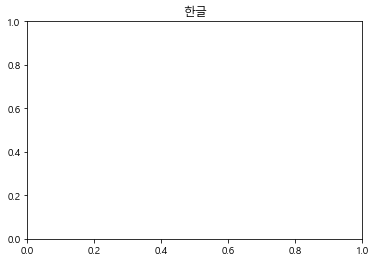

In [43]:
plt.title("한글")

---

## 2. Fbprophet 기초

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})
df.head()

,ds,y
0,2018-01-01,0.000000
1,2018-01-02,0.103243
2,2018-01-03,0.205382
3,2018-01-04,0.305326
4,2018-01-05,0.402007


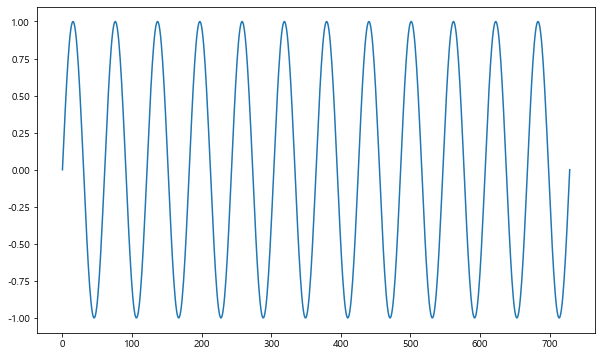

In [47]:
df["y"].plot(figsize=(10, 6))

In [49]:
from fbprophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [50]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


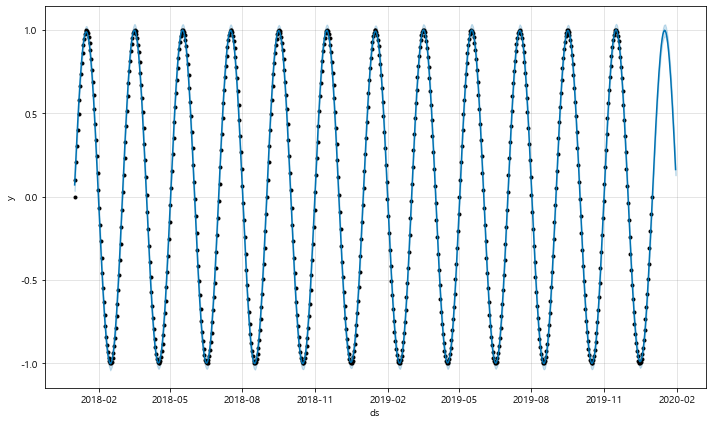

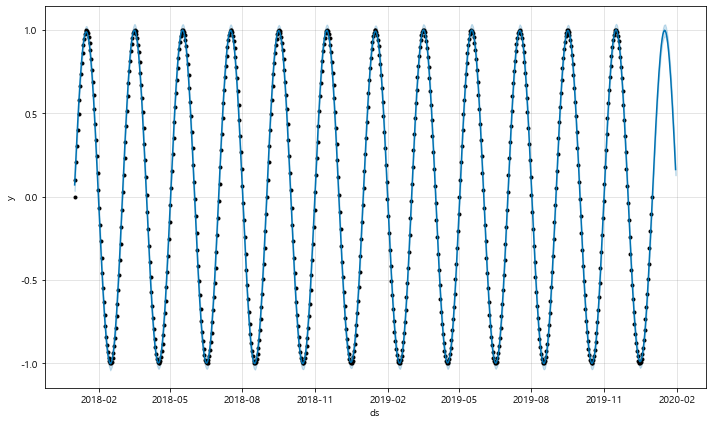

In [51]:
m.plot(forecast)

---

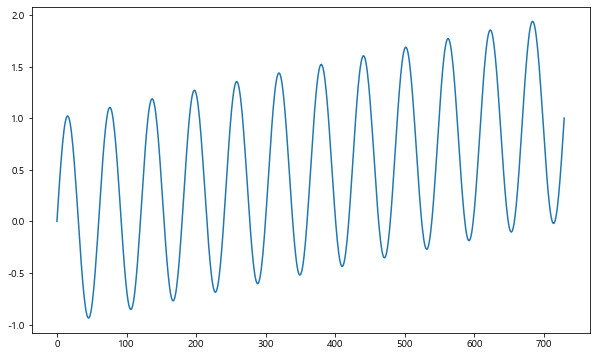

In [52]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time

ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})

df["y"].plot(figsize=(10, 6))

C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


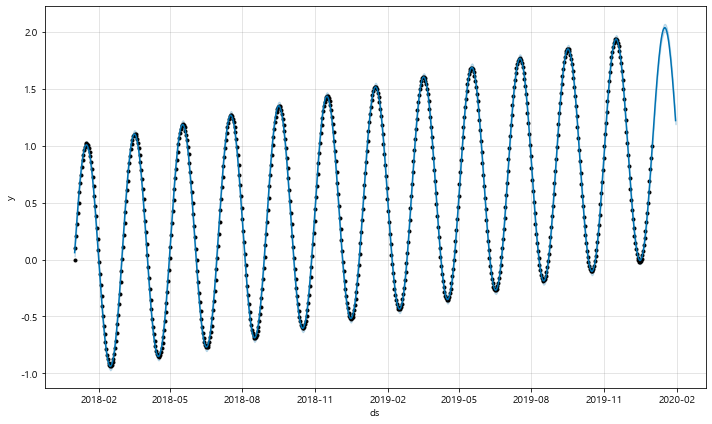

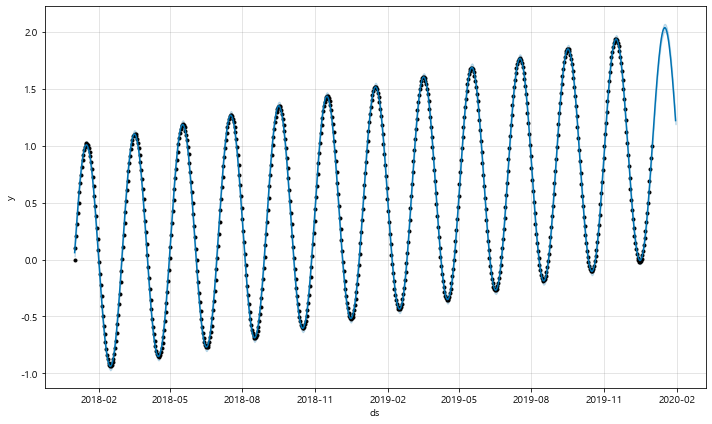

In [53]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

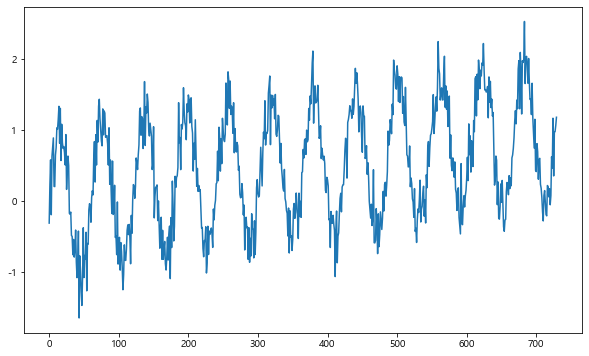

In [54]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4

ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})

df["y"].plot(figsize=(10, 6))

C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


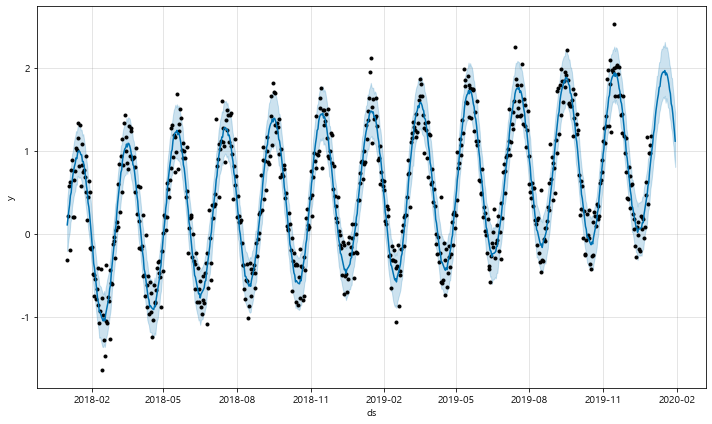

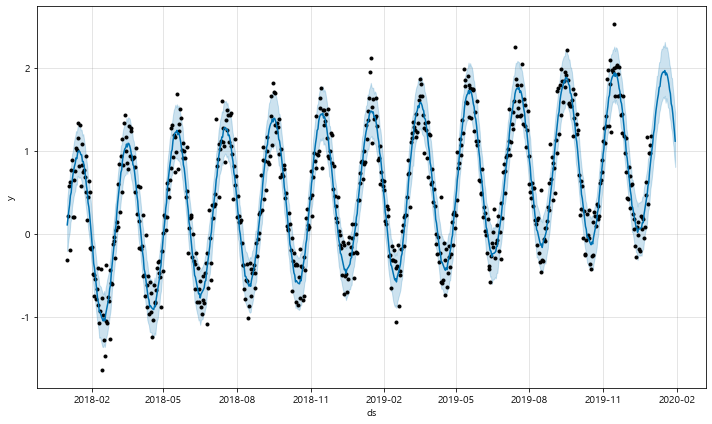

In [55]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

## 3. 시계열 데이터 실전 이용해보기
- https://pinkwink.kr/

In [56]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet
from datetime import datetime

import set_matplotlib_hangul

%matplotlib inline

In [58]:
pinkwink_web = pd.read_csv(
    "../data/05_PinkWink_Web_Traffic.csv",
    encoding="utf-8",
    thousands=",",
    names= ["date", "hit"],
    index_col=0

)

In [60]:
pinkwink_web = pinkwink_web[pinkwink_web["hit"].notnull()]
pinkwink_web

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0
...,...
17. 6. 26.,1309.0
17. 6. 27.,1436.0
17. 6. 28.,1387.0


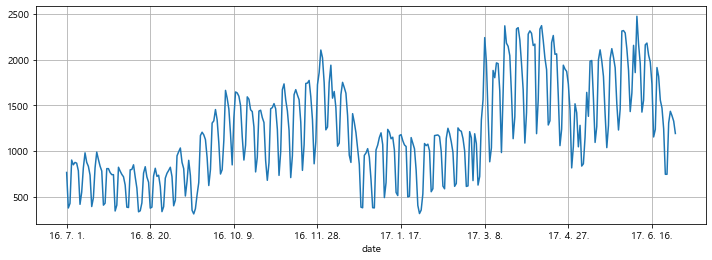

In [62]:
# 전체 데이터 그려보기

pinkwink_web["hit"].plot(figsize=(12, 4), grid=True)

In [66]:
# trend 분석을 시각화하기 위한 x 축 값을 만들기
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web["hit"].values
fx = np.linspace(0, time[-1], 1000)

In [67]:
# 에러를 계산할 함수

def error(f, x, y):
    return np.sqrt(np.mean((f(x)- y) ** 2))

In [69]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

fp2 = np.polyfit(time, traffic, 2)
f2 = np.poly1d(fp2)

fp3 = np.polyfit(time, traffic, 3)
f3 = np.poly1d(fp3)


fp15 = np.polyfit(time, traffic, 15)
f15 = np.poly1d(fp15)



In [73]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.8597308110963
430.6284101894695
429.53280466762925
330.4777306313198


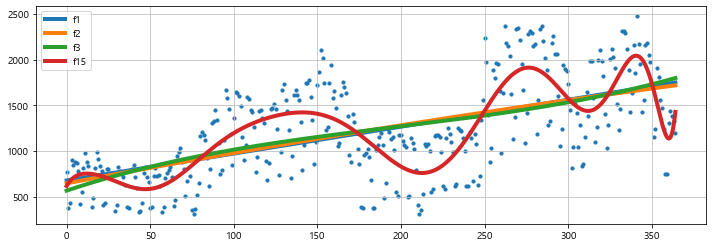

In [75]:
plt.figure(figsize=(12, 4))
plt.scatter(time, traffic, s=10)
plt.plot(fx, f1(fx), lw=4, label="f1")
plt.plot(fx, f2(fx), lw=4, label="f2")
plt.plot(fx, f3(fx), lw=4, label="f3")
plt.plot(fx, f15(fx), lw=4, label="f15")

plt.grid(True, linestyle="-", color="0.75")
plt.legend(loc="best")
plt.show()

In [79]:
df = pd.DataFrame({"ds":pinkwink_web.index, "y": pinkwink_web["hit"]})
df.reset_index(inplace=True)
df["ds"] = pd.to_datetime(df["ds"], format="%y. %m. %d.")
del df["date"]
df.head()


,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [81]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [82]:
# 60일에 해당하는 데이터 예측

future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [84]:
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,896.576571,673.872113,1110.204302
421,2017-08-26,481.544412,278.806091,685.156506
422,2017-08-27,614.212001,394.902824,818.636862
423,2017-08-28,1166.966207,953.734721,1361.886765
424,2017-08-29,1203.000155,997.758825,1412.166319


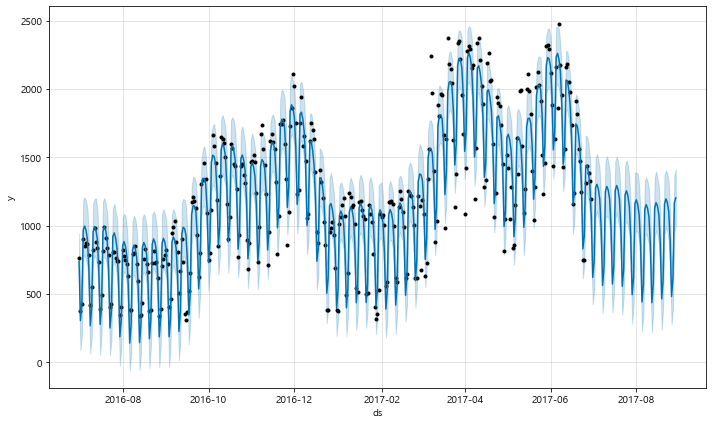

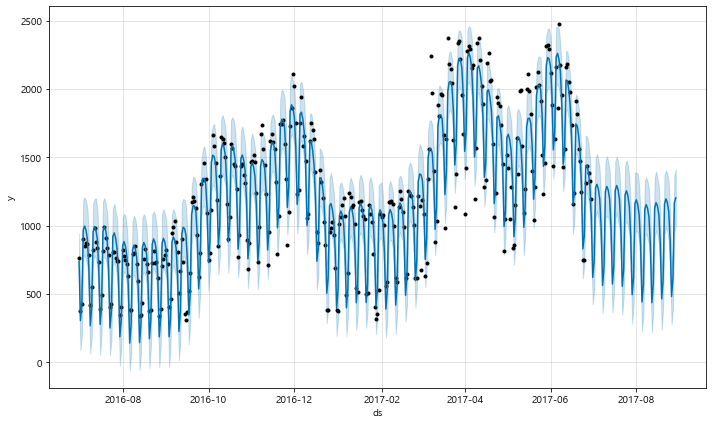

In [85]:
m.plot(forecast)

C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


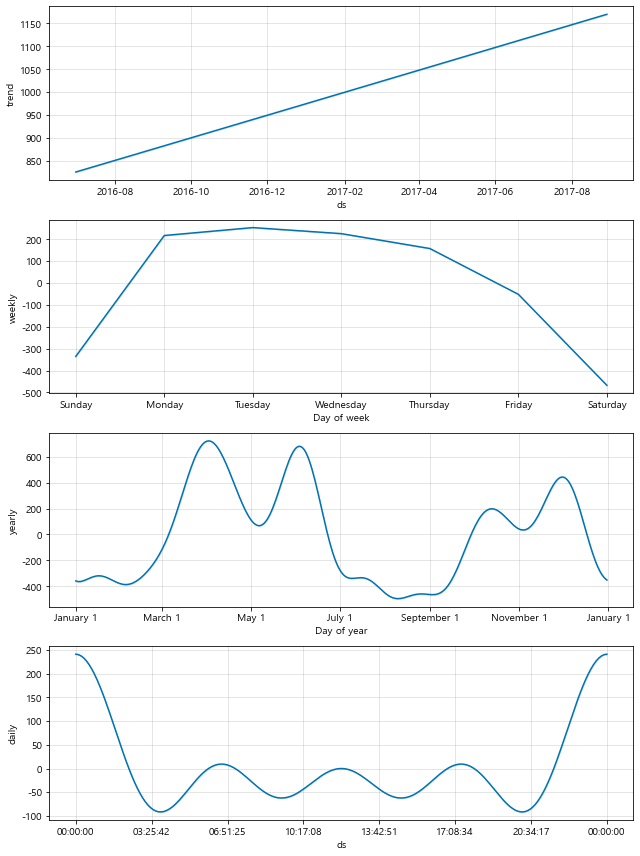

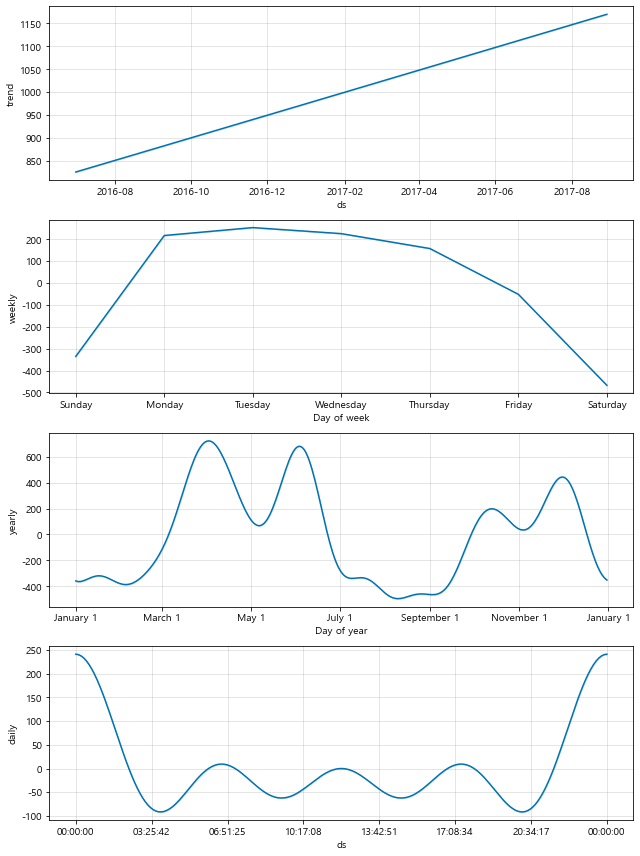

In [86]:
m.plot_components(forecast)

## 4. 주식 데이터 fbprophet으로 분석하기


- 1. yahoo finance
- https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS

In [96]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request

url = "https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS"
req = Request(url, headers={"User-Agent": "Chrome"})
page = urlopen(req).read()
soup = BeautifulSoup(page, "html.parser")
table = soup.find("table")
df_raw = pd.read_html(str(table))[0]
df_raw.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Mar 07, 2022",309000.00,309500.00,305000.00,307500.00,307500.00,457769
1,"Mar 04, 2022",-,-,-,-,-,-
2,"Mar 03, 2022",319000.00,327000.00,318500.00,325500.00,325500.00,580888
3,"Mar 02, 2022",319000.00,319500.00,312000.00,317000.00,317000.00,546099
4,"Feb 28, 2022",314500.00,314500.00,314500.00,314500.00,314500.00,-


In [98]:
# fbprophet 을 사용하는 형식에 맞춰준 뒤 맨 마지막 NaN값이 있어서 제외

df_tmp = pd.DataFrame({"ds": df_raw["Date"], "y": df_raw["Close*"]})
df_target = df_tmp[:-1]
df_target

,ds,y
0,"Mar 07, 2022",307500.00
1,"Mar 04, 2022",-
2,"Mar 03, 2022",325500.00
3,"Mar 02, 2022",317000.00
4,"Feb 28, 2022",314500.00
...,...,...
95,"Oct 18, 2021",396500.00
96,"Oct 15, 2021",393500.00
97,"Oct 14, 2021",395000.00
98,"Oct 13, 2021",382000.00


In [99]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      100 non-null    object
 1   y       100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [115]:
# hardcopy 후, 날짜를 fbprophet이 요구하는 형태로 변형
df = df_target.copy()
df["ds"] = pd.to_datetime(df_target["ds"], format="%b %d, %Y")
df.head()

,ds,y
0,2022-03-07,307500.00
2,2022-03-03,325500.00
3,2022-03-02,317000.00
4,2022-02-28,314500.00
5,2022-02-25,314500.00


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      99 non-null     datetime64[ns]
 1   y       99 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 2.3+ KB


In [126]:
df = df[df.y != '-']
df = df[df.y != '501 Dividend']


In [127]:
df.head()

,ds,y
0,2022-03-07,307500.00
2,2022-03-03,325500.00
3,2022-03-02,317000.00
4,2022-02-28,314500.00
5,2022-02-25,314500.00


In [128]:
# 데이터형 변환 object => float

df["y"] = df["y"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      98 non-null     datetime64[ns]
 1   y       98 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.3 KB


In [129]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [130]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
123,2022-04-02,-5.343828e+06,-5.351381e+06,-5.336065e+06
124,2022-04-03,-5.817039e+06,-5.824958e+06,-5.809400e+06
125,2022-04-04,-6.360707e+06,-6.368109e+06,-6.353370e+06
126,2022-04-05,-6.822047e+06,-6.829996e+06,-6.814630e+06
127,2022-04-06,-7.270402e+06,-7.278164e+06,-7.262715e+06


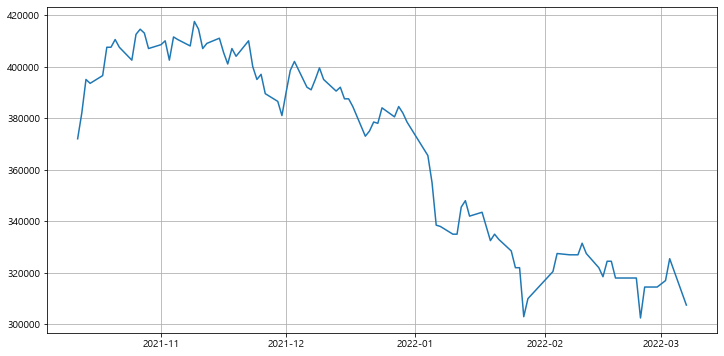

In [132]:
plt.figure(figsize=(12, 6))
plt.plot(df["ds"], df["y"], label="real")
plt.grid(True)
plt.show()

C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


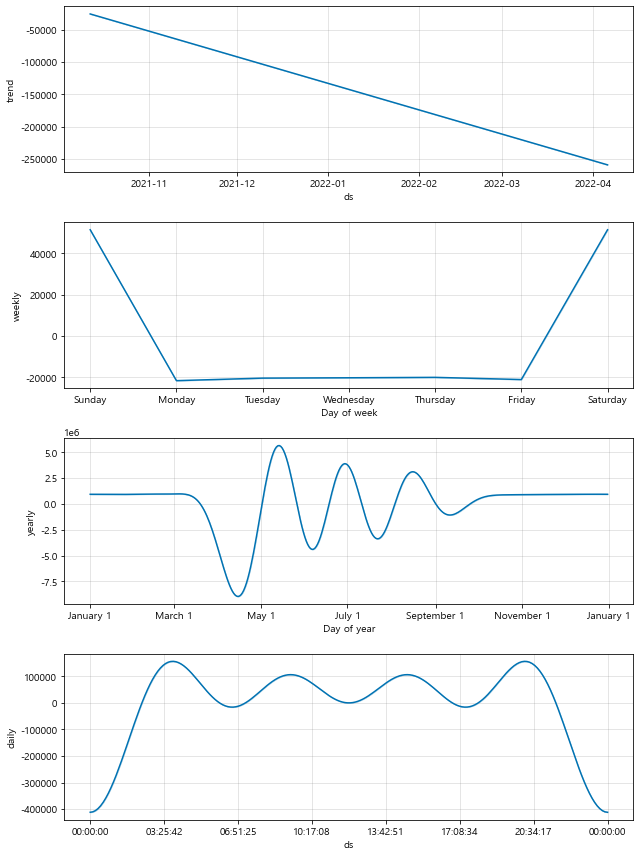

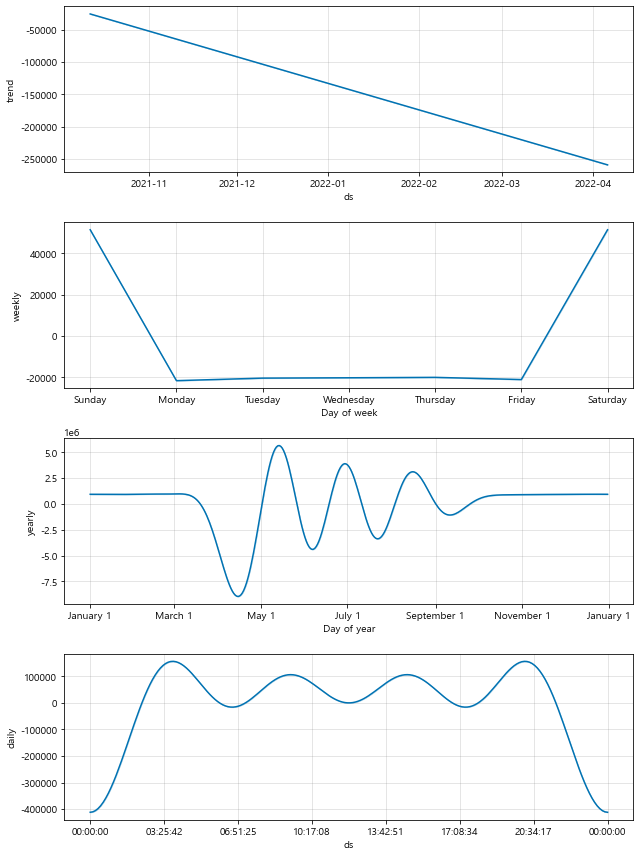

In [133]:
m.plot_components(forecast)

#### 2. KIA

In [135]:
pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=f58bb8cc0e815f796dd70fd4425369a6c981ed9bf14df99f4add048b472b77e5
  Stored in directory: c:\users\nihso\appdata\local\pip\cache\wheels\21\c9\66\b41c847de65c7985db52ec21d59996841598b8b0e93f2b9500
Successfully built multitasking
Note: you may need to restart the kernel to use updated packages.


In [137]:
from pandas_datareader import data 
import yfinance as yf

yf.pdr_override()

start_date="2010-03-01"
end_date="2018-02-28"
KIA = data.get_data_yahoo("000270.KS", start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [138]:
KIA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-02,22050.0,22300.0,21800.0,21850.0,17168.683594,3935516
2010-03-03,22100.0,22450.0,21850.0,22400.0,17600.847656,4380617
2010-03-04,22400.0,22600.0,22300.0,22500.0,17679.423828,2490087
2010-03-05,22500.0,22750.0,22350.0,22750.0,17875.861328,2379282
2010-03-08,23050.0,23100.0,22500.0,22800.0,17915.146484,4326618


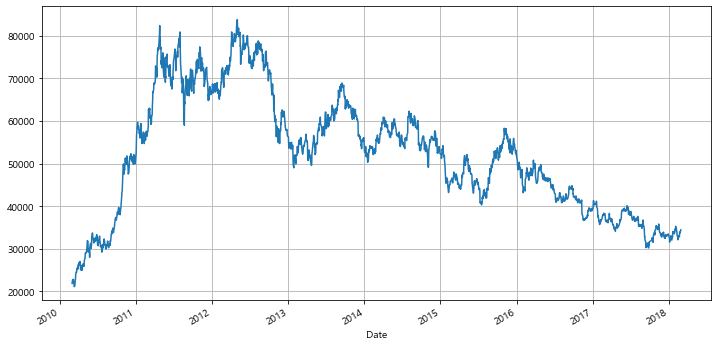

In [139]:
KIA["Close"].plot(figsize=(12, 6), grid=True)

In [140]:
# accuracy 확인을 위한 데이터
KIA_trunc = KIA[:"2017-11-30"]
KIA_trunc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-24,33150.0,33400.0,32800.0,33050.0,29028.685547,773316
2017-11-27,32800.0,33050.0,32450.0,32750.0,28765.187500,1318245
2017-11-28,32650.0,33450.0,32450.0,32950.0,28940.853516,1350643
2017-11-29,33000.0,33500.0,32700.0,33350.0,29292.183594,884282
2017-11-30,33700.0,34250.0,33500.0,33650.0,29555.681641,2048876


In [141]:
df = pd.DataFrame({"ds":KIA_trunc.index, "y": KIA_trunc["Close"]})
df.reset_index(inplace=True)
del df["Date"]
df.head()

,ds,y
0,2010-03-02,21850.0
1,2010-03-03,22400.0
2,2010-03-04,22500.0
3,2010-03-05,22750.0
4,2010-03-08,22800.0


In [142]:
m = Prophet(daily_seasonality=True, yearly_seasonality=True)
m.fit(df)

C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [143]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
2003,2018-02-24,26941.910838,22748.455074,31248.225465
2004,2018-02-25,27027.517307,22960.695200,31134.332727
2005,2018-02-26,27228.793939,22878.290115,31223.058568
2006,2018-02-27,27397.261872,23117.158197,31465.134597
2007,2018-02-28,27444.142597,23382.646307,31414.360580


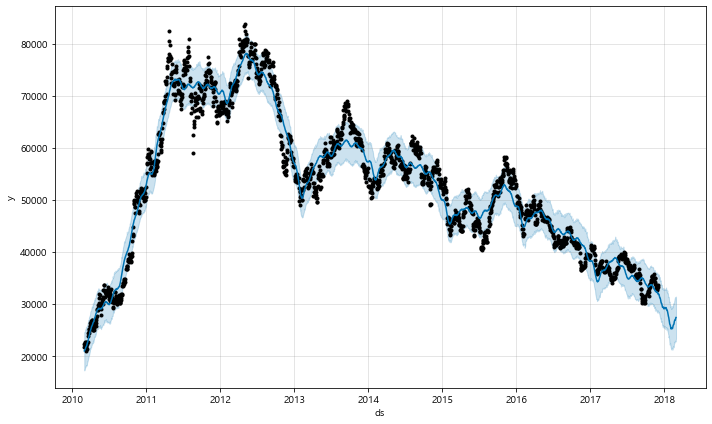

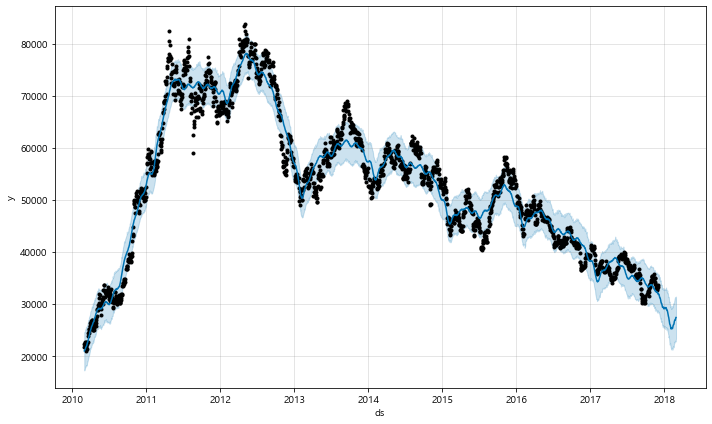

In [144]:
m.plot(forecast)

C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


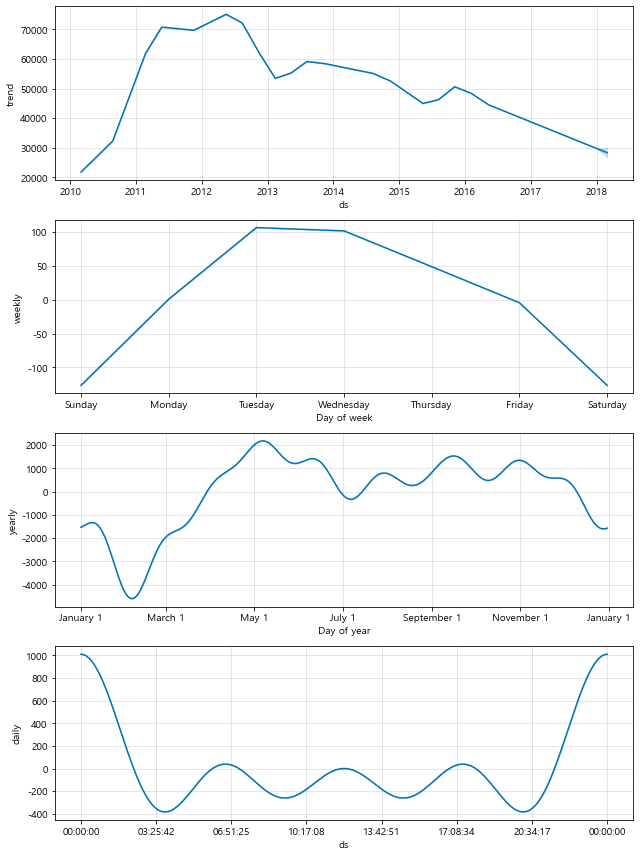

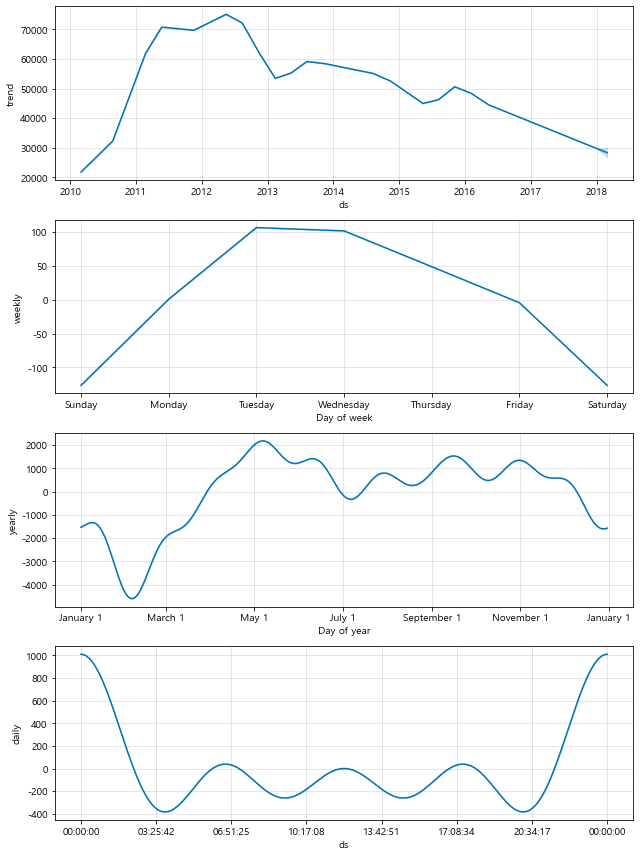

In [145]:
m.plot_components(forecast)

In [146]:
KIA["Close"]

Date
2010-03-02    21850.0
2010-03-03    22400.0
2010-03-04    22500.0
2010-03-05    22750.0
2010-03-08    22800.0
               ...   
2018-02-21    33850.0
2018-02-22    33650.0
2018-02-23    34000.0
2018-02-26    34200.0
2018-02-27    34450.0
Name: Close, Length: 1975, dtype: float64

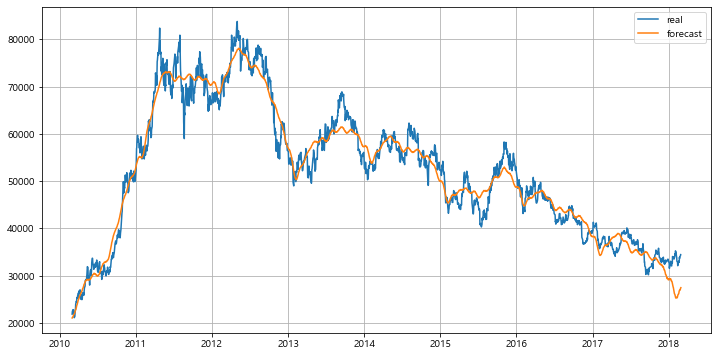

In [147]:
plt.figure(figsize=(12, 6))
plt.plot(KIA.index, KIA["Close"], label="real")
plt.plot(forecast["ds"], forecast["yhat"], label="forecast")
plt.grid(True)
plt.legend()
plt.show()

### 3. 대한항공

In [148]:
## 003490 대한항공

start_date = "2010-03-01"
end_date = "2018-02-28"
KoreanAir = data.get_data_yahoo("003490.KS", start_date, end_date)
KoreanAir.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-21,35350.0,35950.0,35150.0,35350.0,35167.996094,237279
2018-02-22,35050.0,35450.0,34800.0,35000.0,34819.800781,260174
2018-02-23,35200.0,35400.0,34550.0,35150.0,34969.027344,321125
2018-02-26,35300.0,35550.0,33600.0,33900.0,33725.460938,932870
2018-02-27,33900.0,34300.0,33650.0,33900.0,33725.460938,527398


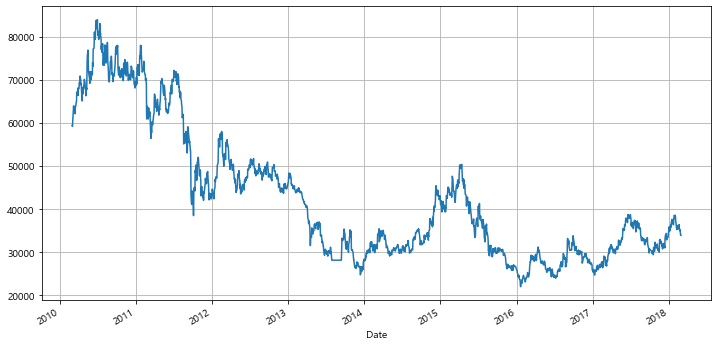

In [150]:
KoreanAir["Close"].plot(figsize=(12, 6), grid=True)

In [151]:
# accuarcy 데이터 분리
KoreanAir_trunc = KoreanAir[:"2017-11-30"]
KoreanAir_trunc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-24,32900.0,33250.0,32300.0,32500.0,32168.935547,530941
2017-11-27,32600.0,32800.0,31800.0,31850.0,31525.556641,472095
2017-11-28,32050.0,32500.0,31550.0,31600.0,31278.103516,708754
2017-11-29,31850.0,32250.0,31050.0,31300.0,30981.160156,850385
2017-11-30,31800.0,32050.0,31350.0,31350.0,31030.650391,682573


In [152]:
# forecast 를 위한 준비

df = pd.DataFrame({"ds":KoreanAir_trunc.index, "y": KoreanAir_trunc["Close"]})
df.reset_index(inplace=True)
del df["Date"]
df.head()

,ds,y
0,2010-03-02,59390.417969
1,2010-03-03,59190.785156
2,2010-03-04,59290.601562
3,2010-03-05,60588.207031
4,2010-03-08,62784.152344


In [153]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [154]:
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
2003,2018-02-24,34885.595354,30989.532267,39097.027008
2004,2018-02-25,34790.953381,30621.012609,39276.337150
2005,2018-02-26,35763.113516,31380.792330,40095.337360
2006,2018-02-27,35606.628578,31326.551271,39770.224450
2007,2018-02-28,35527.670397,31017.311380,39954.243276


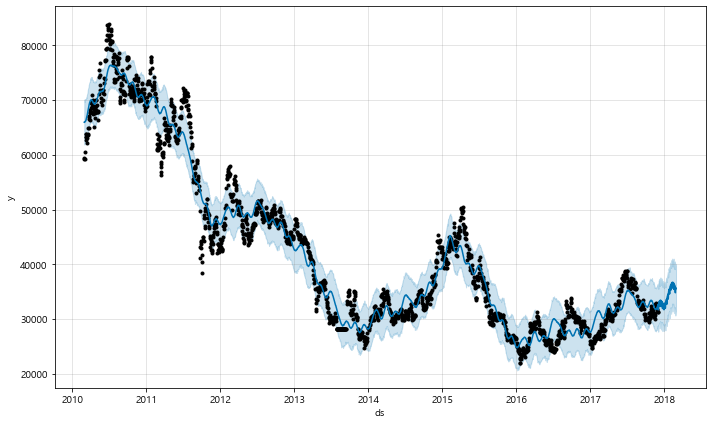

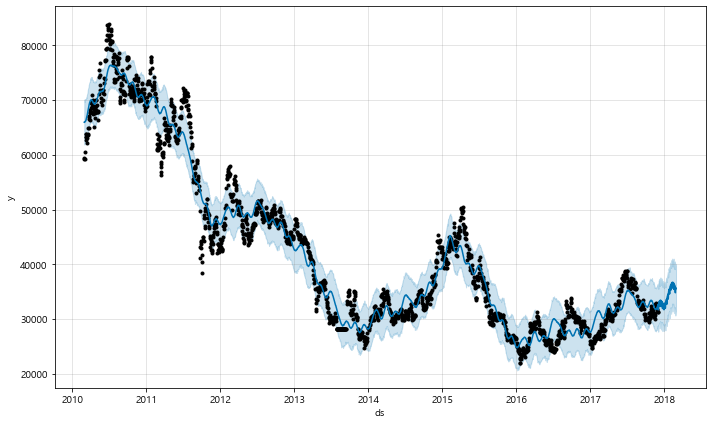

In [155]:
m.plot(forecast)

C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


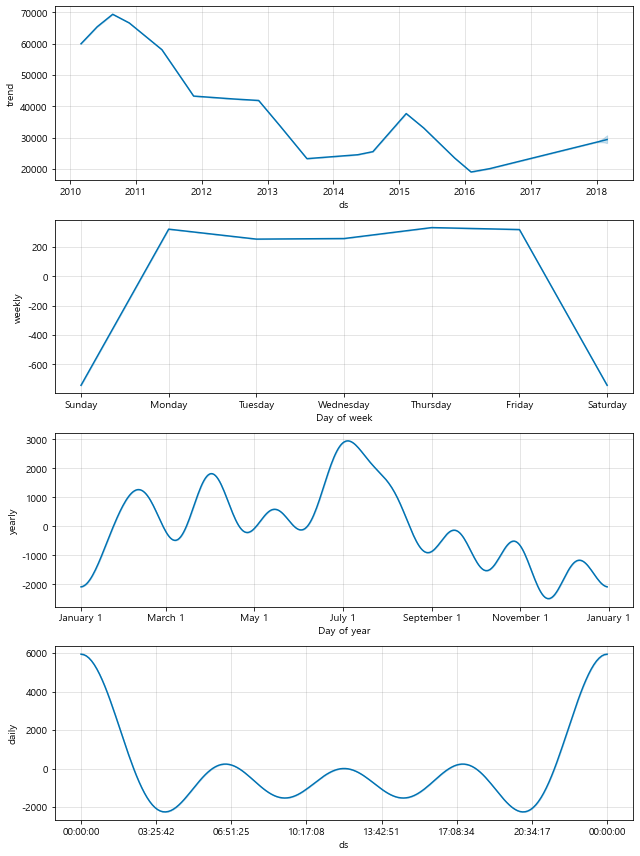

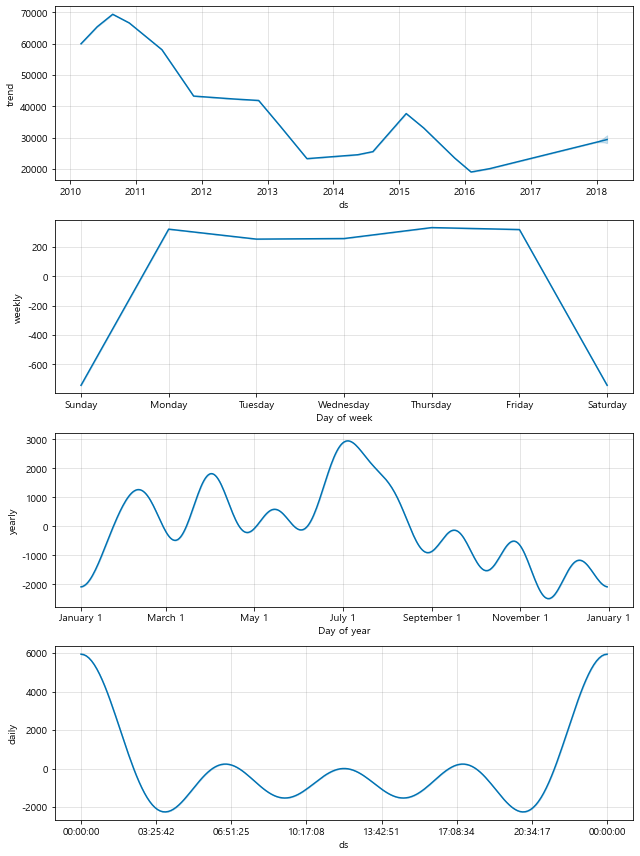

In [156]:
m.plot_components(forecast)

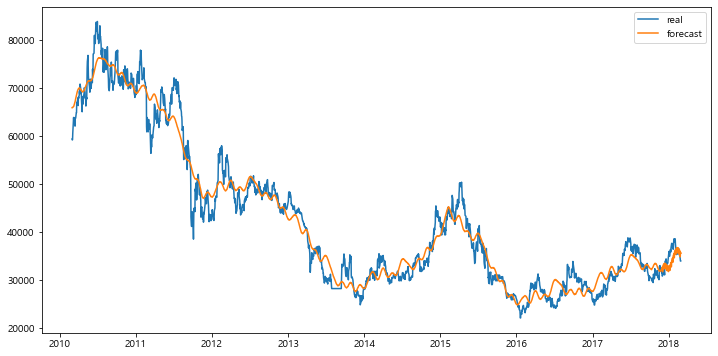

In [157]:
# 실제와 예측값을 비교 그래프

plt.figure(figsize=(12, 6))
plt.plot(KoreanAir.index, KoreanAir["Close"], label="real")
plt.plot(forecast["ds"], forecast["yhat"], label="forecast")
plt.legend()
plt.show()

### 4. 조금 특이한 형태의 데이터에 대한 forecast

In [159]:
df = pd.read_csv("../data/05_example_wp_R2.csv", index_col=0)

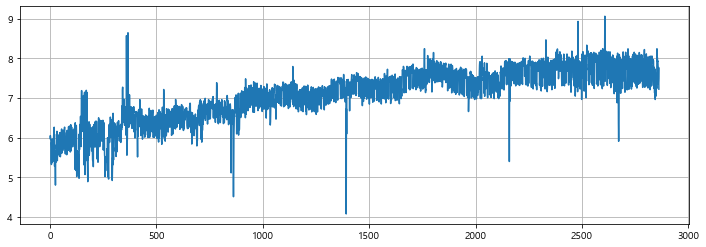

In [161]:
# Logistic 성장형 그래프를 가진 데이터에 대한 forecast
df["y"].plot(figsize=(12, 4), grid=True)

In [162]:
df["cap"] = 8.5

In [163]:
m = Prophet(growth="logistic", daily_seasonality=True)
m.fit(df)

C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\nihso\miniconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


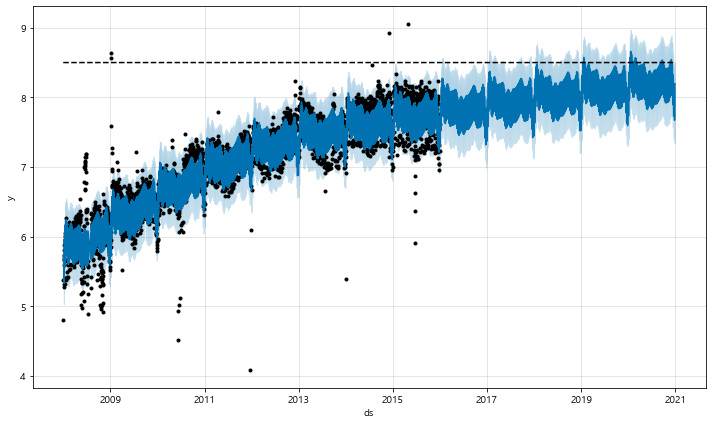

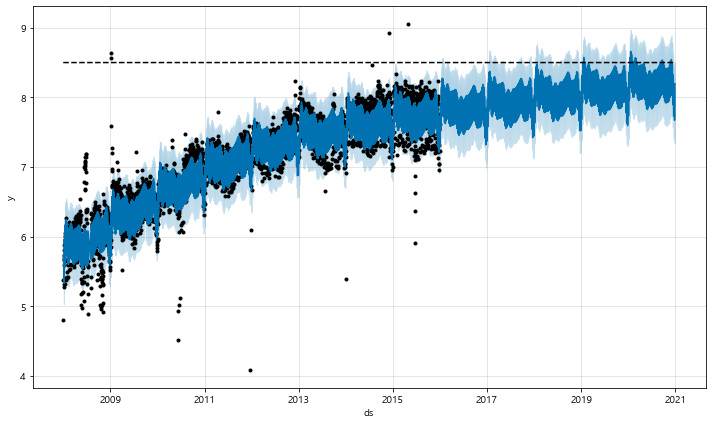

In [164]:
future = m.make_future_dataframe(periods=1826)
future["cap"] = 8.5
forecast = m.predict(future)
m.plot(forecast)

In [165]:
from selenium import webdriver

In [167]:
driver =webdriver.Chrome("../driver/chromedriver.exe")
driver.get("https://bitcoincharts.com/charts/bitstampUSD#rg60ztgSzm1g10zm2g25zv")

C:\Users\nihso\AppData\Local\Temp\ipykernel_13492\2971127674.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver =webdriver.Chrome("../driver/chromedriver.exe")
